# Support Vector Machine


In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

## Load data


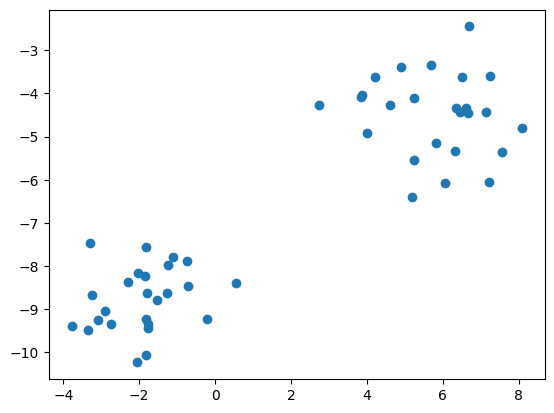

In [37]:
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)
plt.scatter(X[:, 0], X[:, 1])

In [38]:
n_samples, n_features = X.shape
n_samples, n_features

(50, 2)

In [72]:
w = np.zeros(n_features)
b = 0

## Hinge Loss + Train


In [78]:
lr = 0.001
λ = 0.01

for _ in range(100):
    for i, x_i in enumerate(X_train):
        condition = y_train[i] * (np.dot(x_i, w) - b) >= 1

        if condition:
            w -= lr * (2 * λ * w)

        else:
            w -= lr * (2 * λ * w - np.dot(x_i, y_train[i]))
            b -= lr * y_train[i]

w, b

(array([0.58286177, 0.16868225]), -0.06100000000000005)

## Pred


In [79]:
approx = np.dot(X_test, w) - b
pred = np.sign(approx)
pred

array([ 1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.])

## Test


In [80]:
accuracy_score(y_test, pred)

1.0

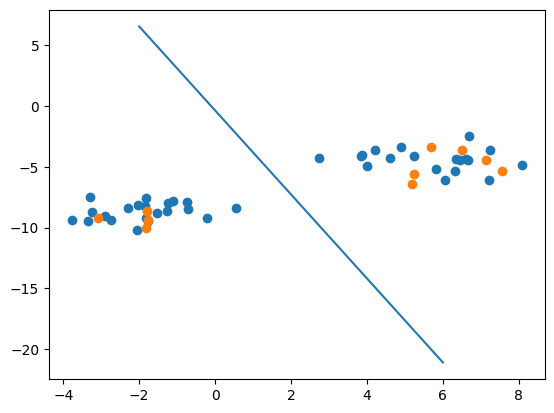

In [115]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.plot([-2, 6], [(-w[0] * x + b) / w[1] for x in [-2, 6]])  # Ax + By = c